## Data Preprocess

In [ ]:
import pandas as pd
news_article=pd.read_csv("/content/drive/MyDrive/Curriculum RL based Text Summarize using T5 PLM/dataset/news_summary.csv",encoding='latin-1')

In [ ]:
news_article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     4514 non-null   object
 1   date       4514 non-null   object
 2   headlines  4514 non-null   object
 3   read_more  4514 non-null   object
 4   text       4514 non-null   object
 5   ctext      4396 non-null   object
dtypes: object(6)
memory usage: 211.7+ KB


In [ ]:
news_article = news_article[['headlines', 'text', 'ctext']]
news_article= news_article.dropna()

In [ ]:
news_article['headlines'] = news_article['headlines'].apply(str.lower)
news_article['ctext'] = news_article['ctext'].apply(str.lower)
news_article['text'] = news_article['text'].apply(str.lower)

In [ ]:
news_article.head()

,headlines,text,ctext
0,daman & diu revokes mandatory rakshabandhan in...,the administration of union territory daman an...,the daman and diu administration on wednesday ...
1,malaika slams user who trolled her for 'divorc...,malaika arora slammed an instagram user who tr...,"from her special numbers to tv?appearances, bo..."
2,'virgin' now corrected to 'unmarried' in igims...,the indira gandhi institute of medical science...,the indira gandhi institute of medical science...
3,aaj aapne pakad liya: let man dujana before be...,lashkar-e-taiba's kashmir commander abu dujana...,lashkar-e-taiba's kashmir commander abu dujana...
4,hotel staff to get training to spot signs of s...,hotels in maharashtra will train their staff t...,hotels in mumbai and other indian cities are t...


In [ ]:
news_article['ctext_word_count'] = news_article['ctext'].apply(lambda x: len(x.split()))
news_article['text_word_count'] = news_article['text'].apply(lambda x: len(x.split()))
news_article['diff'] = news_article['ctext_word_count'] - news_article['text_word_count']

In [ ]:
import matplotlib.pyplot as plt

# Calculate word counts for 'ctext' and 'text' columns
news_article['ctext_word_count'] = news_article['ctext'].apply(lambda x: len(x.split()))
news_article['text_word_count'] = news_article['text'].apply(lambda x: len(x.split()))

# Calculate the difference in word counts
news_article['diff'] = news_article['ctext_word_count'] - news_article['text_word_count']

# Plotting
plt.figure(figsize=(15, 6))

# Plot 1: Bar chart for 'ctext' word counts
plt.subplot(3, 1, 1)
plt.bar(news_article.index, news_article['ctext_word_count'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Word Count')
plt.title('Bar Chart for ctext Word Counts')

# Plot 2: Bar chart for 'text' word counts
plt.subplot(3, 1, 2)
plt.bar(news_article.index, news_article['text_word_count'], color='salmon')
plt.xlabel('Index')
plt.ylabel('Word Count')
plt.title('Bar Chart for text Word Counts')

# Plot 3: Bar chart for the difference in word counts between 'ctext' and 'text'
plt.subplot(3, 1, 3)
plt.bar(news_article.index, news_article['diff'], color='lightgreen')
plt.xlabel('Index')
plt.ylabel('Word Count Difference')
plt.title('Bar Chart for Word Count Differences')

plt.tight_layout()
plt.show()


## Curriculum creation for training

In [ ]:
news_article.head()

,headlines,text,ctext,ctext_word_count,text_word_count,diff
0,daman & diu revokes mandatory rakshabandhan in...,the administration of union territory daman an...,the daman and diu administration on wednesday ...,364,60,304
1,malaika slams user who trolled her for 'divorc...,malaika arora slammed an instagram user who tr...,"from her special numbers to tv?appearances, bo...",396,60,336
2,'virgin' now corrected to 'unmarried' in igims...,the indira gandhi institute of medical science...,the indira gandhi institute of medical science...,335,60,275
3,aaj aapne pakad liya: let man dujana before be...,lashkar-e-taiba's kashmir commander abu dujana...,lashkar-e-taiba's kashmir commander abu dujana...,404,60,344
4,hotel staff to get training to spot signs of s...,hotels in maharashtra will train their staff t...,hotels in mumbai and other indian cities are t...,526,60,466


In [ ]:
import numpy as np
quantiles = np.percentile(news_article['diff'], [25, 50, 75])

print("25th percentile:", quantiles[0])
print("50th percentile (median):", quantiles[1])
print("75th percentile:", quantiles[2])

25th percentile: 127.0
50th percentile (median): 224.0
75th percentile: 353.0


In [ ]:
easy_thresh = 127
medium_thresh = 224

def difficulty(diff):
    if diff<= easy_thresh:
        return 'easy'
    elif diff <= medium_thresh:
        return 'medium'
    else:
        return 'hard'

In [ ]:
news_article['difficulty'] = news_article['diff'].apply(difficulty)

In [ ]:
news_article.head()

,headlines,text,ctext,ctext_word_count,text_word_count,diff,difficulty
0,daman & diu revokes mandatory rakshabandhan in...,the administration of union territory daman an...,the daman and diu administration on wednesday ...,364,60,304,hard
1,malaika slams user who trolled her for 'divorc...,malaika arora slammed an instagram user who tr...,"from her special numbers to tv?appearances, bo...",396,60,336,hard
2,'virgin' now corrected to 'unmarried' in igims...,the indira gandhi institute of medical science...,the indira gandhi institute of medical science...,335,60,275,hard
3,aaj aapne pakad liya: let man dujana before be...,lashkar-e-taiba's kashmir commander abu dujana...,lashkar-e-taiba's kashmir commander abu dujana...,404,60,344,hard
4,hotel staff to get training to spot signs of s...,hotels in maharashtra will train their staff t...,hotels in mumbai and other indian cities are t...,526,60,466,hard


In [ ]:
difficulty_count = news_article['difficulty'].value_counts()

In [ ]:
difficulty_count


hard      2194
easy      1103
medium    1099
Name: difficulty, dtype: int64

In [ ]:
#Dataset on the basis of difficulty
easy_subset= news_article[news_article['difficulty'] == 'easy']
medium_subset= news_article[news_article['difficulty'] == 'medium']
hard_subset= news_article[news_article['difficulty'] == 'hard']

In [ ]:
easy_subset.head()

,headlines,text,ctext,ctext_word_count,text_word_count,diff,difficulty
14,"nearly 2,300 cpwd buildings in delhi unsafe: u...",a union minister of state for home affairs inf...,"as many as 2,297 residential buildings under t...",148,59,89,easy
17,maruti spare parts trigger bomb scare at delhi...,bomb squads and canine teams were rushed to ch...,"new delhi, aug 2 (pti) bomb squads and canine ...",128,50,78,easy
27,german hiker found in swiss alps 30 yrs after ...,"the remains of a german hiker, who disappeared...",the remains of a german hiker who disappeared ...,150,59,91,easy
28,veteran actor dilip kumar hospitalised in mumbai,veteran actor dilip kumar has been admitted to...,yesteryear superstar dilip kumar was rushed to...,167,58,109,easy
31,amarnath yatra attack mastermind to be kashmir...,"abu ismail, mastermind of the amarnath yatra a...",slain lashkar-e-taiba (let) commander abu duja...,159,55,104,easy


In [ ]:
easy_subset = easy_subset.drop(columns= ['ctext_word_count', 'text_word_count','diff' , 'difficulty'] )
medium_subset = medium_subset.drop(columns= ['ctext_word_count', 'text_word_count','diff' , 'difficulty'] )
hard_subset = hard_subset.drop(columns= ['ctext_word_count', 'text_word_count','diff' , 'difficulty'] )

In [ ]:
def preprocess_data(df):
    df['Article'] = df['headlines'] + ": " + df['ctext']
    df['Summary'] = df['text']
    df = df.drop(columns=['headlines', 'ctext', 'text'])
    prefix = 'summarize: '
    df['Article'] = prefix + df['Article']

    return df

In [ ]:
easy_subset_pre= preprocess_data(easy_subset)
medium_subset_pre= preprocess_data(medium_subset)
hard_subset_pre= preprocess_data(hard_subset)


#Reset ids
easy_subset_pre = easy_subset_pre.reset_index(drop=True)
medium_subset_pre = medium_subset_pre.reset_index(drop=True)
hard_subset_pre = hard_subset_pre.reset_index(drop=True)

In [ ]:
medium_subset_pre

,Article,Summary
0,summarize: chopper flying critically low led t...,an inquiry by the aircraft accident investigat...
1,summarize: congress opens 'state bank of tomat...,the congress party has opened a bank called 's...
2,"summarize: virgin means unmarried, nothing off...","defending the igims marital declaration form, ..."
3,summarize: us tests unarmed intercontinental b...,the us air force on wednesday successfully lau...
4,summarize: j&k cops ask pak high commission to...,jammu and kashmir police have approached the p...
...,...,...
1094,summarize: pm modi indeed working like a donke...,as up cm akhilesh yadav and pm narendra modi t...
1095,"summarize: stop hypocrisy, open your mind: dis...","actress disha patani, while responding to a pe..."
1096,summarize: new poster of 'baahubali 2' featuri...,a new poster of the upcoming epic historical f...
1097,"summarize: asha bhosle gets ?53,000 power bill...",the maharashtra government has initiated an in...


## T5 PLM model with Reinforecement Learning

In [ ]:
from transformers import T5Tokenizer
from sklearn.model_selection import train_test_split

In [ ]:
easy_train, easy_val_test = train_test_split(easy_subset_pre, test_size=0.3, random_state=42)
easy_val, easy_test = train_test_split(easy_val_test, test_size=0.5, random_state=42)

medium_train, medium_val_test = train_test_split(medium_subset_pre, test_size=0.3, random_state=42)
medium_val, medium_test = train_test_split(medium_val_test, test_size=0.5, random_state=42)

hard_train, hard_val_test = train_test_split(hard_subset_pre, test_size=0.3, random_state=42)
hard_val, hard_test = train_test_split(hard_val_test, test_size=0.5, random_state=42)

In [ ]:
tokenizer = T5Tokenizer.from_pretrained("t5-small")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def tokenize_and_process(data):
    input_text = data["Article"].tolist()
    target_summary = data["Summary"].tolist()

    # Tokenize input text and target summary
    tokenized_input = tokenizer(input_text, padding="max_length", truncation=True, max_length=512, return_tensors="pt")
    tokenized_summary = tokenizer(target_summary, padding="max_length", truncation=True, max_length=128, return_tensors="pt")

    # Add special tokens for target summary
    tokenized_input["labels"] = tokenized_summary["input_ids"]

    return tokenized_input

In [ ]:
# Tokenize each subset separately
easy_train_tokenized = tokenize_and_process(easy_train)
easy_val_tokenized = tokenize_and_process(easy_val)
easy_test_tokenized = tokenize_and_process(easy_test)

medium_train_tokenized = tokenize_and_process(medium_train)
medium_val_tokenized = tokenize_and_process(medium_val)
medium_test_tokenized = tokenize_and_process(medium_test)

hard_train_tokenized = tokenize_and_process(hard_train)
hard_val_tokenized = tokenize_and_process(hard_val)
hard_test_tokenized = tokenize_and_process(hard_test)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Move all tensors to the selected device
easy_train_tokenized = {key: value.to(device) for key, value in easy_train_tokenized.items()}
easy_val_tokenized = {key: value.to(device) for key, value in easy_val_tokenized.items()}
easy_test_tokenized = {key: value.to(device) for key, value in easy_test_tokenized.items()}

medium_train_tokenized = {key: value.to(device) for key, value in medium_train_tokenized.items()}
medium_val_tokenized = {key: value.to(device) for key, value in medium_val_tokenized.items()}
medium_test_tokenized = {key: value.to(device) for key, value in medium_test_tokenized.items()}

hard_train_tokenized = {key: value.to(device) for key, value in hard_train_tokenized.items()}
hard_val_tokenized = {key: value.to(device) for key, value in hard_val_tokenized.items()}
hard_test_tokenized = {key: value.to(device) for key, value in hard_test_tokenized.items()}

## Model Training

In [ ]:
from transformers import T5ForConditionalGeneration, AdamW , get_linear_schedule_with_warmup
import torch
from torch.utils.data import DataLoader, TensorDataset
import os

In [ ]:
model = T5ForConditionalGeneration.from_pretrained('t5-small')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [ ]:
def create_data_loader(tokenized_data, batch_size, shuffle=True):
    dataset = TensorDataset(tokenized_data['input_ids'], tokenized_data['attention_mask'], tokenized_data['labels'])
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

In [ ]:
batch_size = 8

# Create data loaders for easy subset
easy_train_dataloader = create_data_loader(easy_train_tokenized, batch_size, shuffle=True)
easy_val_dataloader = create_data_loader(easy_val_tokenized, batch_size, shuffle=False)
easy_test_dataloader = create_data_loader(easy_test_tokenized, batch_size, shuffle=False)

# Create data loaders for medium subset
medium_train_dataloader = create_data_loader(medium_train_tokenized, batch_size, shuffle=True)
medium_val_dataloader = create_data_loader(medium_val_tokenized, batch_size, shuffle=False)
medium_test_dataloader = create_data_loader(medium_test_tokenized, batch_size, shuffle=False)

# Create data loaders for hard subset
hard_train_dataloader = create_data_loader(hard_train_tokenized, batch_size, shuffle=True)
hard_val_dataloader = create_data_loader(hard_val_tokenized, batch_size, shuffle=False)
hard_test_dataloader = create_data_loader(hard_test_tokenized, batch_size, shuffle=False)

In [ ]:
#optimizer = AdamW(model.parameters(),lr=5e-5)
#num_training_steps = len(train_dataloader) * num_epochs
#scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,num_training_steps=num_training_steps)
#loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# Define function to create optimizer and scheduler
def create_optimizer_and_scheduler(model, dataloader, num_epochs):
    optimizer = AdamW(model.parameters(), lr=5e-5)
    num_training_steps = len(dataloader) * num_epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)
    return optimizer, scheduler

In [ ]:
def create_loss_function():
    return torch.nn.CrossEntropyLoss()

In [ ]:
num_epochs = 5

In [ ]:
easy_optimizer, easy_scheduler = create_optimizer_and_scheduler(model, easy_train_dataloader, num_epochs)
easy_loss_fn = create_loss_function()

C:\Users\shubh\anaconda3\envs\ns\Lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Function to plot training loss
def plot_loss(losses):
    plt.figure(figsize=(10, 6))
    for subset, loss_list in losses.items():
        plt.plot(range(1, len(loss_list) + 1), loss_list, label=f'{subset} subset')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')
    plt.legend()
    plt.show()

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge

In [ ]:
def evaluate_rouge(model, dataloader):
    rouge = Rouge()
    hypotheses = []
    references = []

    for batch in dataloader:
        input_ids, attention_mask, labels = batch

        # Generate summaries from the model
        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=100, num_beams=4, early_stopping=True)

        # Decode generated summaries and add them to hypotheses
        decoded_summaries = [tokenizer.decode(output, skip_special_tokens=True, clean_up_tokenization_spaces=False) for output in outputs]
        hypotheses.extend(decoded_summaries)

        # Add reference summaries to references
        references.extend([tokenizer.decode(label, skip_special_tokens=True, clean_up_tokenization_spaces=False) for label in labels])

    # Check if hypotheses and references are empty
    if not hypotheses:
        print("Hypotheses are empty.")
    if not references:
        print("References are empty.")

    # Compute ROUGE scores
    rouge_scores = rouge.get_scores(hypotheses, references, avg=True)
    return rouge_scores

In [ ]:
def save_checkpoint(model, optimizer, scheduler, epoch, subset, step, filename):
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'epoch': epoch,
        'step': step
    }
    save_path = os.path.join(checkpoint_dir, f'{filename}.pth')
    torch.save(checkpoint, save_path)
    print(f'Saved checkpoint at: {save_path}')


In [ ]:
import torch
import wandb
from torch.cuda.amp import autocast, GradScaler
scaler = GradScaler()

In [ ]:
def train_curriculum_model_with_rouge(model, optimizer, scheduler, loss_fn, train_dataloaders, val_dataloaders, num_epochs, save_interval=98):
    total_steps = 0
    losses = {'easy': [], 'medium': [], 'hard': []}  # Store losses for each subset

    # Initialize Weights and Biases run
    wandb.init(project="news_summary", name="logs_hard_")

    for epoch in range(num_epochs):
        for subset, dataloader in train_dataloaders.items():
            model.train()
            total_loss = 0.0

            for step, batch in enumerate(dataloader):
                optimizer.zero_grad()

                input_ids, attention_mask, labels = batch

                with autocast():
                    # Forward pass
                    outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                    loss = outputs.loss

                # Scale the loss
                scaler.scale(loss).backward()

                # Unscaled step (perform optimization step)
                scaler.step(optimizer)
                scaler.update()

                scheduler.step()

                total_loss += loss.item()

                total_steps += 1

                # Save checkpoint every few steps
                if total_steps % save_interval == 0:
                    save_checkpoint(model, optimizer, scheduler, epoch, subset, total_steps, f'step_{total_steps}')

                # Log metrics to Weights and Biases
                wandb.log({"loss": loss.item(), "epoch": epoch, "subset": subset, "step": total_steps})

            avg_loss = total_loss / len(dataloader)
            losses[subset].append(avg_loss)

            val_rouge_scores = evaluate_rouge(model, val_dataloaders[subset])

            print(f'Epoch {epoch + 1}/{num_epochs}, Subset: {subset}, Average Loss: {avg_loss}, ROUGE Scores: {val_rouge_scores}')

            # Log validation ROUGE scores
            wandb.log({"val_ROUGE_Scores": val_rouge_scores})

In [ ]:
val_dataloaders = {
    'easy': easy_val_dataloader,
    'medium': medium_val_dataloader,
    'hard': hard_val_dataloader
}


## easy_subset

In [ ]:
import torch
if torch.cuda.is_available():
    print("GPU is available!")
    device = torch.device("cuda")
else:
    print("GPU is not available. Using CPU.")
    device = torch.device("cpu")

print("PyTorch is using device:", device)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

GPU is available!
PyTorch is using device: cuda


In [ ]:
checkpoint_dir = r"C:\New folder (2)\checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

#Train for easy
train_curriculum_model_with_rouge(model, easy_optimizer, easy_scheduler, easy_loss_fn, {'easy': easy_train_dataloader}, val_dataloaders, num_epochs)


In [ ]:
model.save_pretrained(r"C:\New folder (2)\checkpoints\easy_5epochs")

## Medium_subset_training

In [ ]:
model_1 = T5ForConditionalGeneration.from_pretrained(r"C:\New folder (2)\checkpoints\easy_5epochs")
model_1.to(device)

In [ ]:
medium_optimizer, medium_scheduler = create_optimizer_and_scheduler(model_1, medium_train_dataloader, num_epochs)
medium_loss_fn = create_loss_function()

In [ ]:
train_curriculum_model_with_rouge(model_1, medium_optimizer, medium_scheduler, medium_loss_fn, {'medium': medium_train_dataloader}, val_dataloaders, num_epochs)

In [ ]:
model_1.save_pretrained(r"C:\New folder (2)\checkpoints\Medium_subset")

## Hard_Subset_training

In [ ]:
model_2 = T5ForConditionalGeneration.from_pretrained(r"C:\New folder (2)\checkpoints\Medium_subset")
model_2.to(device)

In [ ]:
# For hard subset
hard_optimizer, hard_scheduler = create_optimizer_and_scheduler(model_2, hard_train_dataloader, num_epochs)
hard_loss_fn = create_loss_function()

C:\Users\shubh\anaconda3\envs\ns\Lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
train_curriculum_model_with_rouge(model_2, hard_optimizer, hard_scheduler, hard_loss_fn, {'hard': hard_train_dataloader}, val_dataloaders, num_epochs)

In [ ]:
model_2= model_2 = T5ForConditionalGeneration.from_pretrained(r"C:\New folder (2)\checkpoints\hard_subset")

## Usage

In [ ]:
# Example input text
input_text = "Denisse Rudich, Senior Policy Advisor at The Sentry, said: “Following the publication of the supplemental business advisory by the US Government, banks in the US and abroad, particularly in countries such as in Singapore, Thailand, and the UAE should monitor transactions to stop the flow of funds suspected of being linked to the military junta and carry out enhanced due diligence. They should engage with their correspondent banking networks, taking measures to prevent de-risking and ensure that humanitarian aid organizations, civilians, and essential sectors of the economy maintain unhindered access to the international financial system. Oliver Windridge, Director of Illicit Finance Policy at The Sentry, said: “We welcome the supplemental advisory on Burma by the US Government. It complements the continued targeted sanctions policy adopted by the US to constrain and contain the Myanmar junta by restricting access to funds that finance its brutal war on the people of Myanmar. Targeted sanctions will not solve the crisis in the country on their own, but as essential financial tools of pressure, they must be wielded by the US and its like-minded partners in a coordinated manner and against networks of enablers to enhance their effectiveness. In addition to sanctions, the advisory identifies high-risk business sectors that companies will want to stay clear of to prevent their potential complicity in the atrocities of the Myanmar junta. It nevertheless encourages legitimate and responsible trade and investment flows that benefit the Myanmar population. Yadanar Maung, Justice For Myanmar spokesperson, said: “It is positive that the US is continuing to advise companies in Myanmar to act responsibly and avoid key sectors that provide the junta with funds and resources that it needs to commit atrocities. However, this advice needs to be urgently backed up with more targeted sanctions by the US in coordination with its allies, including Australia, which remains exposed to Myanmar’s mining sector. There still are too many gaps in the sanctions that have been imposed and a large number of businesses and individuals that remain unsanctioned, despite evidence of complicity in the junta’s international crimes. Ajit Maity, who is an MLA from Paschim Medinipur's Pingla assembly constituency, claimed that the protesters were making false allegations about him. West Bengal's Sandeshkhali has been on the boil with massive unrest for over 10 days as women protestors are seeking justice against alleged sexual assault committed by Trinamool Congress (TMC) leader Shahjahan Sheikh and his supporters."

In [ ]:
# Tokenize the input text
inputs = tokenizer("summarize: " + input_text, return_tensors="pt", max_length=512, truncation=True)
# Generate summary
outputs = model.generate(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"], max_length=150, num_beams=4, early_stopping=True)
# Decode the output tokens into text
summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Generated Summary:", summary)

Generated Summary: a senior policy advisor at the Sentry, denisse Rudich, said: “we welcome the supplemental business advisory on burma by the US Government. it complements the continued targeted sanctions policy adopted by the US to constrain and contain the Myanmar junta by restricting access to funds that finance its brutal war on the people of Myanmar. the advisory identifies high-risk business sectors that companies will want to stay clear of to prevent potential complicity in the atrocities of the Myanmar junta.


# Result Analysis

In [ ]:
!pip install bert_score

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: chopper flying critically low led to 2015 bombay high crash: two years after a helicopter crash near the bombay high offshore oil field killed two pilots, an inquiry by the air accident investigation bureau (aaib) found that the chopper was flying at a critically low height, without the pilots realising it. the pawan hans helicopter was on a training sortie on the evening of november 4, 2015. aviation regulator director general of civil aviation (dgca) had asked aaib?to conduct an inquiry. the inquiry report, which was made public on wednesday, said that the main pilot was flying low and that the other did not realise it. after taking off, the rontappmeyer (rytyr) helicopter may have faced difficulties as the moon was waning, the report said. the report mentioned that the instructor, captain e samuel, wasn?t disoriented and was aware of the low height of the helicopter. he alerted captain tk guha a little late, but even after realising that guha wasn?t able to manag

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: congress opens 'state bank of tomato' in lucknow: it sounds like satire, but make no mistake: at a time when tomatoes have become forbiddingly pricey, the congress party has opened a 'state bank of tomato' in uttar pradesh's capital, ani reported on wednesday.this extraordinary development comes days after indore wholesalers leery of tomato thieves requested - and got - security cover for their stock, according to news reports. heavy rains in tomato-growing states have destroyed crop and affected transportation - a choke on supply which the goods and services tax regime could have possibly exacerbated. lucknow (up): in a unique protest against the rising prices of the tomatoes, congress opens bank called â??state bank of tomatoâ??. pic.twitter.com/lnpaaexgmuin fact, denizens of major cities have had to dish out rs 100 or more for a kilogram of the kitchen staple.nevertheless, an official at the indian council for agricultural research has said he expects supplies fr

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: virgin means unmarried, nothing offensive in it: minister: bihar health minister mangal pandey has defended a controversial questionnaire put out by patna's indira gandhi institute of medical sciences (igims) for its staff. the ridiculous marital declaration questionnaire asked igims employees to mention their marital status. "i looked the dictionary for the actual meaning of the word virgin. it means unmarried and i don't find anything objectionable in the usage of the word," mangal pandey said."however, when the issue was brought to my notice i enquired igims management about it. they told me the format used in the form is the same which is used at aiims (all india institute of medical science)," he added. the form also asks male employees to provide details if they have more than one wife.women employees apart from declaring status regarding their virginity have also been asked to provide details on whether they are married to a person who has no other wife livin

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: us tests unarmed intercontinental ballistic missile: the us air force successfully launched an unarmed intercontinental ballistic missile from california, the fourth such test this year.the 30th space wing says the minuteman 3 missile launched at 2:10 a.m. wednesday from vandenberg air force base, about 130 miles (209 kilometers) northwest of los angeles.an air force statement said the test would show the effectiveness, readiness, and accuracy of the weapon system.minuteman missiles are regularly tested with launches from vandenberg that send unarmed re-entry vehicles 4,200 miles (6,800 kilometers) across the pacific to a target area at kwajalein atoll.however, the latest u.s. launches come amid tensions with north korea as that nation develops its own icbms.flight data on north korea?s most recent test, conducted friday, showed that a broad part of the mainland united states, including los angeles and chicago, is now in range of pyongyang?s weapons, according to an

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: j&k cops ask pak high commission to claim let leader's body: jammu and kashmir police approached the pakistan high commission in delhi and asked them to claim the body of lashkar-e-taiba (let) divisional commander abu dujana, killed by the security forces on tuesday.munir khan, inspector general of police (igp) kashmir told reporters on tuesday that pakistan high commission has been approached to claim the body of dujana, who belonged to gilgit-baltistan area in pakistan-administered part of kashmir.this is for the first time the authorities have approached pakistan high commission asking them to claim the body of any pakistani national killed in anti-militancy operations in jammu and kashmir.?if they don?t claim his body, we will give him a proper burial,? the igp said, adding that authorities wished dujana?s parents should see their son before burial and for that reason the commission had been approached.police refused to hand over dujana?s body to the civilians f

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: us prez donald trump called white house a real dump: report: us president donald trump has called the white house a ?real dump?, and said that he preferred staying at his own properties rather than at the executive mansion, a media report said.the white house did not immediately respond to a request for comment about the account, which appeared on the website golf.com. the hotelier-turned-potus reportedly told members of his trump national golf course in bedminster, new jersey, that he preferred staying at his own properties rather than at 1600 pennsylvania ave nw, because the executive mansion is ?a real dump?, the washington post reported, citing the article on golf.com as saying.trump, in a may interview with time magazine, had praised the white house for its ?beautiful kitchen?, ?amazing? phone system and ?incredible? historical furniture. ?people have no idea the beauty of the white house. the real beauty of the white house,? trump earlier said.meanwhile, takin

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: uk-based doctor charged with 118 sexual offences: a gp who practised in east london has been charged with 118 sexual offences. manish shah, of brunel close in romford, is accused of 65 counts of assault by penetration and 52 allegations of sexual assault, the metropolitan police said. the 47-year-old is also charged with one count of sexual assault on a child under 13. the offences were alleged to have occurred at a gp practice between june 2004 and july 2013 and relate to 54 victims.the charges announced on wednesday follow a long-running investigation into shah. he has been bailed several times, having first been arrested in 2013.he is due to appear at barkingside magistrates court on thursday 31 august. shah is registered as a doctor working with the national health service. the police investigation began over four years ago, after claims of sexual assault were made to detectives, and uncovered a series of allegations concerning alleged sexual offences.specialist

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: jk rowling apologises for tweets against donald trump: london, aug 1 (pti) renowned harry potter author j k rowling has apologised for wrongly accusing us president donald trump of refusing to shake the hand of a 3-year-old disabled child during an event. the 52-year-old british novelist, best known as the author of the harry potter fantasy series, said yesterday that she deleted her july 28 tweets after she was informed that they were "not a full or accurate representation" of what had happened at last mondays health care event at the white house. rowling came under fire for a series of now-deleted tweets in which she slammed trump for seeming to ignore montgomery weers outstretched hand. "how stunning, and how horrible, that trump cannot bring himself to shake the hand of a small boy who only wanted to touch the president," the author had said. but marjorie kelly weer, mother of montgomery, said rowlings interpretation of the clip was wrong. "re: my tweets about t

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: donald trump ready for war with north korea: us senator: a republican senator said tuesday that us president donald trump has told him he would go to war to destroy north korea rather than allow it to develop a long-range nuclear-armed missile.influential lawmaker lindsey graham, a foreign policy hawk, told nbc?s today show: ?there is a military option: to destroy north korea?s programme and north korea itself.?last week, north korean leader kim jong-un boasted that his country could now strike any target in the united states after carrying out its latest intercontinental ballistic missile test.world powers have been trying to stifle pyongyang?s weapons programme through united nations-backed sanctions, but have failed to daunt the regime and washington is growing frustrated.graham said if diplomacy, and in particular pressure from the north?s neighbour china, fails to halt the programme then the united states will have no choice but to take devastating military act

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: n korea travel ban to take effect from september 1: us: the united states on wednesday officially set september 1 as the start date for a ban prohibiting its citizens from travelling to north korea.?the department of state has determined that the serious risk to united states nationals of arrest and long-term detention represents imminent danger to the physical safety of united states nationals travelling to and within the democratic people?s republic of korea (dprk),? read the restriction as it appeared on wednesday in the us government?s federal register.?all united states passports are declared invalid for travel to, in, or through the dprk unless specially validated for such travel,? it added.an exemption was noted for approved humanitarian travel and for journalists in some circumstances. the ban is to remain in effect for one year, unless it is revoked sooner by us secretary of state rex tillerson.the travel ban was first announced last month in the wake of th

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: in govt interest to protect jobs at air india: fm jaitley: new delhi, aug 1 (pti) finance minister arun jaitley today said a "proper decision" would be taken on air indias future in a competitive market and that it would be in the governments interest to protect jobs at the airline. his remarks come at a time when a group of ministers headed by him is working on the modalities for the divestment of loss-making air india. in a competitive market, challenges are different and a "proper decision" would be taken on what air india has to do in such a market, jaitley said in the lok sabha. "is mein karmchariyon ke services bachee rahen, is mein hamara bhi swarth hai (it will be in the interest of the government to protect the jobs at air india)," he said while replying to a discussion on supplementary demands for grants. noting that the airline has a debt of rs 50,0000-55,000 crore which is "not small", he said, "now we have to decide what has to be done with the air indi

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: sleeping on film sets is a gifted moment in script: big b: bollywood star amitabh bachchan, who is currently shooting for his upcoming film ?102 not out?, says sleeping on a film?s set is a gifted moment in the script for an actor.?sleep -- that mechanism that has been a constant in us all... like taking in air to breathe and survive... and the opportunity of catching up with its loss, on set is a gifted moment in the script, rare but so welcome,? amitabh wrote on his blog on monday night. amitabh also shared a photograph of himself from a film?s set, where he was seen taking a nap. the 74-year-old actor is seen wearing a white kurta pyjama, socks and a monkey cap in the image.  the piku actor said that with the lighting on the set, one actually goes of to sleep. ?one actually goes to sleep, while the lighting and the action and the scene is being conducted... such a delight. and my sleep was genuine, they actually had to come and wake me up to tell me that it was o

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: bible, quran removed from abdul kalam's tamil nadu memorial: indian authorities have removed a copy of the bible and the quran from a new statue of a former president after a complaint by a hindu nationalist party, officials said tuesday.the removal of the books has fuelled a religious row over a carving depicting a hindu holy book placed next to the statue of apj abdul kalam at rameswaram in the southern state of tamil nadu.kalam, who as a scientist played a leading role in india?s landmark 1998 nuclear weapons tests, was president from 2002-2007 and a strongly secular figure.the sculpted hindu bhagvad gita book was placed next to the statue before it was inaugurated by prime minister narendra modi last week on the second anniversary of kalam?s death.relatives placed the bible and the quran next to the gita in protest. that infuriated the hindu makka katchi nationalist party, which said it made the complaint to police.?the authorities removed the bible and the qura

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: first met srk with a drunk girl hanging on to him: imtiaz: even after two and a half decades in bollywood, shah rukh khan continues to make women go weak in the knees just by flashing his dimpled smile. jab harry met sejal director imtiaz ali told dna about the time he first met srk, and it will have the actor's female fans fall more in love with him."it was in london for a film festival. we all were hanging out and i saw shah rukh coming up a very narrow aisle somewhere in the hotel, with a drunk girl hanging on to him. he was dealing with her so gracefully without demeaning her," the filmmaker said.imtiaz said that shah rukh was extremely gentle with the girl and did not lose his cool at any point of time. "gauri (khan, shah rukh's wife) was also with him and everybody was trying to deal with this crazy fan. he was particularly being nice to the girl. when he saw me, he stopped, and we had quite a long conversation even as the girl kept murmuring 'oh shah rukh, oh

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: 15-yr-old haryana girl pregnant after being raped by cousins: a 15-year-old girl was found to be seven-month pregnant after two of her cousins allegedly raped her several times. police said they have arrested one of the accused, a juvenile, while the other is on the run. the incident, reported from a village in sonepat?s kharkhoda block, comes close on the heels of a series of similar incidents being reported from the state in the last two months. the police said the girl was taken to a hospital by her family on july 29 after she complained of stomach ache. the victim then narrated her ordeal to her mother. she said she was first raped by her cousins in december last year when they barged into her house when she was alone. the accused allegedly continued to rape her, threatening to kill her parents if she informed anyone.the girl, a school dropout, did not inform anyone out of fear. the police have registered a case under the prevention of children from sexual offen

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: female teacher suspended for getting a massage from student: a woman teacher in odisha?s sambalpur district on tuesday placed under suspension on charge of getting herself massaged by a girl student in the school.the authorities took action against the lady teacher after a video of the incident went viral in the social media.sambalpur district education officer (deo), pramod panda confirmed about the suspension of the lady teacher of sikirdi project upper primary school, bharati meher.the deo said meher was suspended after the video came to our notice on?tuesday.meher, who is also in-charge headmistress of the school, admitted that a girl student had massaged her head. however, she said that the incident had taken place around two years ago when she was sitting in the office room.?because of severe headache, i went inside the office room and sat there on that day. however, a class viii girl student came to me to call me to take class. but on seeing my condition, she

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: no accurate govt data on illegal migrants: kiren rijiju: the government has no ?accurate data? regarding illegal migrants who have entered india, the lok sabha was informed on tuesday.minister of state for home kiren rijiju also said that any particular community cannot be ?branded? for having alleged links with terrorists and terrorism. ?we cannot say that,? he said during the question hour.he agreed that several illegal migrants have acquired documents to make their stay in the country legal.responding to supplementaries, he said since these people have entered the country in a ?clandestine and surreptitious manner?, ?naturally? official figures would be impossible.the centre has asked the states to set up special task forces in each of the districts for detection, identification and interception of illegal migrants.the states also have powers under the 1946 foreigners act to deport illegal migrants. detention centres have also been set up for detaining suspected 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: hansal denies reports of kangana turning editor for simran : director hansal mehta has trashed all speculation around the kangana ranaut-starrer simran, saying that they are "false, malicious and totally fabricated".mehta dismissed the reports that kangana had taken over editing of the trailer after being unhappy over the first cut. "all this speculation is false, malicious and totally fabricated. i collaborate closely with my team and my actors are an integral part of that collaboration. it angers me that every time some malicious gossip has to be spread, people meaninglessly drag kangana into their stupid machinations. she is a valued friend, actor and collaborator. period," mehta said in a statement."i'm even more hurt that some malicious person chooses to drag my relationship with vishal bhardwaj into this malice. vishal is one of my dearest friends and if i am making films today it is because of him. i would never say anything that could remotely even hurt or u

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: jaguar should've paid me for making the brand popular: sukhe: punjabi rapper-singer sukhe?s career is on a roll. two years after delivering the hit song, jaguar, with rapper bohemia, he feels that the car brand  owners should have paid him for promoting them. ?haan, i do think that (they should have paid him). jab mera gaana aaya tha, tab very few people knew about the car brand jaguar. i hail from garhshankar, a small village in punjab, and people there didn?t even know that cars of this name existed. after the song was out, there were so many jaguars to be seen on the roads, suddenly in places like chandigarh!?, he laughs, adding, ?jab next part aayega, i will definitely be approaching them, ki now you have to help me out.?sukhe, who is currently working on tracks for a couple of bollywood films is happy that almost every hindi film today features a punjabi song. ?at the end, what matters is result. punjabi songs ki wajah se promotion hoti hai films ki, and thus c

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: paytm to launch own messaging service: reports: leading digital payments firm paytm plans to launch a messaging service to rival facebook inc?s whatsapp by the end of august, a source familiar with the matter said on tuesday.softbank and alibaba-backed paytm is seeking to attract people in india to use the new messaging service embedded in its app, which many already use to buy everything from food to plane tickets.paytm?s messaging service will allow users to send audio, video and pictures and texts, the source, who declined to be named, said.paytm currently has more than 225 million users.earlier this year, another home grown messaging platform hike rolled out an in-app electronic payments service to cash in on rising digital transactions in india.e-payments in india surged after the country banned old high-value currency notes late last year. firms like paytm have since rapidly increased their market share. digital payments in india would jump nearly 10 times to 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: woman stabbed in front of 4-yr-old son outside thyagaraj: a 40-year-old woman was stabbed outside the thyagraj stadium in south delhi on monday evening even as her four-year-old son watched.santoshi, a resident of the nearby prem nagar colony, was returning home with her son from a weekly market near the stadium when the incident took place. eyewitnesses told police that a man, seemingly in his mid thirties jumped from behind and stabbed the woman multiple times. the spot outside thyagraj stadium where a woman was stabbed to death. 
							(picture: sourced)
						santoshi cried for help, alerting three security guards at the stadium. her attacker, however, fled the spot leaving behind the kitchen knife used in the murder. a police team reached the spot and rushed her to the trauma centre where santoshi was declared dead. doctors told police that she had been stabbed at least five times. santoshi, a mother of five was separated from her husband. her husband, police 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: tata motors ceo earned a salary of ?22.5 crore: new delhi, jul 31 (pti) tata motors ceo and managing director guenter butschek took home over rs 22.55-crore salary last fiscal, while other key officials saw their remunerations cut in a year when the company was saddled with losses. however, most of the independent directors of the company except nusli wadia, who was removed from the board in december last year, saw their remunerations grow in high double digits, as per the companys annual report for 2016-17. ravi pisharody, erstwhile executive director and former head of the companys commercial vehicles (cv) business unit who had quit the company last month, saw his salary drop by 17 per cent to rs 2.3 crore in the last fiscal. likewise, executive director satish borwankar, who has taken over as chief operating officer, drew a remuneration of rs 2.14 crore last fiscal, a cut of 12 per cent. tata motors chief financial officer c ramakrishnan also saw his salary trimm

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: sc to hear plea seeking cancellation of nitish's mlc stature: the supreme court on tuesday agreed to hear a plea seeking cancellation of bihar chief minister nitish kumar?s membership of the state legislative council for allegedly concealing a pending criminal case against him.a bench of justices justice dipak misra, amitava roy and am khanwilkar said it will look into the matter after petitioner advocate ml sharma sought an urgent hearing of his plea.the bench said it would see when the matter could be listed for hearing.the plea, which was filed on?monday, alleged that there was a criminal case against the jd(u) leader wherein he was accused of killing a local congress leader sitaram singh, and injuring four others ahead of lok sabha by-election to the barh constituency in 1991.the petitioner has also sought a direction to the cbi to register an fir against kumar in the case.?respondent number 2 (election commission), despite knowing facts about his (kumar?s) crim

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: ryan reynolds shares 1st look of 'domino' from deadpool 2: hollywood actor ryan reynolds seems to know exactly what deadpool fans want to see. the 40-year-old actor took to twitter and shared the first image of actress zazie beetz as domino.with his usual quirky style, he captioned the snap, ?some people just know how to work a red carpet.? in the photo, domino is seen lounging in front of a fireplace atop of deadpool, who has been flattened out into a rug.some people just know how to work a red carpet. #domino #deadpool2 pic.twitter.com/llcc8jfkt6? ryan reynolds (@vancityreynolds) july 31, 2017the snap is a callback to one of the first photos of reynolds as deadpool, the one where he was lying on a rug in front of a huge fireplace.the real name of the character is neena thurman and like her mutant name might suggest, she has the ability to alter her luck in situations through telekinetic acts.reynolds has not been shy about sharing photos from the set of the highly

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: centuries-old statue unearthed at angkor temple complex: archaeologists have unearthed a large, centuries-old statue that is believed to have once stood guard over an ancient hospital at cambodia?s famed angkor temple complex.the nearly two metre tall carving, which is thought to be from the late 12th to the early 13th century, was discovered during a dig on saturday, said long kosal, a spokesman for apsara authority ? the state agency charged with managing the complex. the angkor archeological park, a world heritage site, contains the remains of the different capitals of the khmer empire, dating from the 9th to the 15th centuries, and is cambodia?s most popular tourist destination.at the height of its power the city and its hundreds of temples boasted more than a million inhabitants, making it one of the world?s most populous pre-industrial centres. huge swathes of the park have been excavated over the decades, creating a walkable archaeological wonder that attract

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: woman's headless body found in a suitcase in mumbai: dead body of a woman aged around 20 to 25 was found in a agricultural farm off the palm beach road in navi mumbai on monday afternoon. mahendra tandel, owner of the farm, was on a regular visit, when he found a suitcase dumped at one corner. while he tried lifting it, he found it be heavy. feeling suspicious he alerted the police and a team from nri coastal police station reached the spot.when the police officials opened the suitcase, they found a headless body of a woman. it is suspected that the woman was murdered and her body was stuffed inside the suitcase and dumped at the farm, which is located in a secluded area. the body has been sent for autopsy at the navi mumbai municipal hospital to ascertain the cause and time of her death.dcp s pathare from navi mumbai said, "we have sent pictures of the deceased to all the police stations and control rooms to establish her identity. we are checking missing people's 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: indian army team participates in tank race in russia: an indian army team has participated in a tank race competition in russia along with groups from several other countries including china, the army said on tuesday.the tank biathlon commenced at alabino ranges on july 29 and the indian army participated in it with t-90 tanks.a t-72 tank, operated by a crew from uganda, drives during the tank biathlon competition, part of the international army games 2017, at a range in the settlement of alabino outside moscow, russia, july 29, 2017. 
							(reuters)
						a total of 19 countries have participated in the event and the top 12 of them will be selected for stage ii relay race out of which only four will qualify for the final stage of the race on august 12, the army said in a release.the tank biathlon competition is an international event conducted as part of the international army games held every year since 2013 at alabino ranges in russia.international army games i

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: flight crew averts mid-air fire caused by phone: crew on a sri lankan airlines plane carrying 202 passengers have extinguished a mid-flight fire triggered by a mobile phone battery in an overhead locker, the carrier said monday.the airline said a ?major? incident was averted by the quick-thinking attendants on the flight sunday from kochi to colombo.smoke was detected shortly after a meal service on the 70-minute flight, it said.the smoke came from an overhead bin, the airline added, thanking its crew for ?averting a major incident?.  crew suspected a lithium battery fire and put the luggage in water after failing to stop the smoke with a fire extinguisher, an airline statement said.?the situation was successfully contained and the bag ceased to emit smoke,? the statement said. ?upon investigation, the crew found a lithium battery pack and two mobile phones in the bag.?the airline did not give the make or model of the battery and the phones involved, but said an inv

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: don?t make lynchistan out of hindustan: congress: the congress on monday accused the nda government of encouraging cow vigilantism and said there was an environment of fear and terror among the people.?the government is indirectly encouraging groups like the vishwa hindu parishad, bajrang dal and gau bhakts (cow vigilantes),? congress leader mallikarjun kharge said in the lok sabha while participating in a debate on mob lynchings. he also urged the government not to turn hindustan into ?lynchistan?. ?don?t make lynchistan out of hindustan,? kharge said.he said the incidents of mob lynchings were not coming down.slamming the bjp governments in jharkhand and madhya pradesh, the congress leader said: ?jharkhand and madhya pradesh have become mob lynching centres.?kharge was referring to increasing incidents of cow vigilantes lynching people on suspicion of carrying beef or while ferrying cattle.kharge said that minorities, dalits and women were being targeted under the

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: gurugram civic body puts free parking signs outside malls: the municipal corporation of gurugram (mcg), which earlier waived off property tax for several malls on the condition of providing free basement parking to city residents, has decided to put up ?free parking? signboards at entry points of malls on mg road.the move has come after mcg received complaints that malls continued to charge visitors for parking despite their commitment to provide the service for free.v umashankar, mcg commissioner, said, ?in case people find mall managements violating the free parking commitments, they can lodge complaints instantly. we have issued instructions to mall managements in this regard.??visible display of ?free parking? signboards will help people. our purpose is to translate commitment of free parking into a reality for visitors,? said umashankar, adding that he is working on a plan to improve the mall mile at mg road.earlier, in march, the mcg had decided not to levy pr

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: gorkhaland protestors give centre 10 days to intervene: the gorkha janamukti morcha has given a ten-day deadline to the centre to intervene in the gorkhaland statehood stir as the indefinite shutdown in the hills entered its 47th day on monday.?we have given a ten-day deadline to the union government to intervene. an indefinite shutdown is going on for the last 47 days. the centre can?t just sit idle when the hills are burning,? gjm assistant general secretary binay tamang told reporters on sunday night.the 30-member gorkhaland movement coordination committee (gmcc), a body of all the hill parties of darjeeling, is in delhi for an all-party meeting.the gmc has sought an appointment with union home minister rajnath singh to brief him on the ongoing crisis in the hills.?we have sought a meeting with union home minister rajnath singh in order to brief him on the ongoing crisis in the hills. the indefinite shutdown has entered its 47th day, which is the longest-ever shu

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: fake luxury watches worth ?10 cr seized at delhi airport: they look like premium rado watches at first glance, only they are not. several first copies of the high-end watches were seized by the directorate of revenue intelligence  at cargo complex of delhi?s indira gandhi international airport (igia). the watches were part of a consignment coming from china. the consignment also carried huge quantity of cameras, sunglasses and mobile accessories worth rs 10 crore.original rado watches cost over a lakh and the copes seized by dri were meant to be sold in the market for rs 4,000-5,000. ?based on a specific input, we intercepted a consignment at the cargo complex. though the sender had declared it as cosmetics and other daily use items, when opened, watches, shoes, pen drives, memory cards and other mobile accessories were found in huge quantities,? a dri official said.the seizure was made on thursday, but the dri is still counting the number of watches and evaluation 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: chhattisgarh to start ambulance service for cows:  the chhattisgarh government will begin an ambulance service for cows, chief minister raman singh said, joining a number of bjp-ruled states to put a stronger focus on protection of the animal that is considered sacred by hindus.the service will be started in ten districts in the next few months, singh said, addressing a programme organised by the state?s commission for protection of cows at pandit ravi shankar university on sunday.protecting cows and promoting products derived from them has been in focus since the rise of the bharatiya janata party with the election of prime minister narendra modi three years ago, at times being seen as a factor that has emboldened vigilante ?gau rakshaks? who have killed and attacked people. the uttar pradesh government announced a similar service, as did a particular district in madhya pradesh over the last year. raman singh did not elaborate on how much the scheme will cost.on su

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: i won't do roles like 'heroine's behen' in films: ridhima : ridhima pandit, who shot to fame with the portrayal of a humanoid robot on tv show bahu hamari rajni kant, is sure that she will never do small roles in films. she says,?i am not getting any good offers, and frankly, i will never play crappy roles like [the] heroine?s behen or anything like that. i want to do roles that are substantial enough to help the story move ahead. also, my demand is more on television [shows]. if i can be the queen on tv, why should i go and become a princess in films??she is currently seen in the comedy show the drama company,which stars comedians such as krushna abhishek, sudesh lahri, and sanket bhosale. happy that she got a chance to explore the physical comedy space, ridhima says, ?the whole team is happy having me as a part of the show. the experience is totally different from daily soaps. there are no retakes, and the camera is rolling for at least an hour to shoot the whole 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: gujarat flood death toll crosses 200 mark: widespread flooding in gujarat has killed more than 200 people and paralysed infrastructure, with tens of thousands of cotton farmers also suffering heavy damage.more than a million households had been affected and losses to farmlands were being assessed. over 4000 animals have been killed due to the floods. more than 50,000 cotton farmers are struggling to drain water from their land and homes.prime minister narendra modi said that flood-affected areas are being closely monitored and relief operations are being undertaken on a massive scale. army, air force and national disaster response force (ndrf) personnel rescued 12,798 people, of which 825 were airlifted by the iaf.as many as 80,000 people were relocated to safer places, including 38,241 in banaskantha and patan, it said.several of the affected roads are still under water which will delay the construction work, it said. the damage is assessed at rs 10 crore for natio

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: govt to take action against corrupt officials from aug 15: prime minister narendra modi has time and again claimed that corruption has come down since he took charge and that providing graft-free rule is on top of his priority. now, to further polish its taint-free image, the government is preparing a crackdown on corrupt officials.according to a government notification available exclusively with india today, the vigilance department of each ministry has been asked to prepare a dossier of tainted and corrupt officials.what you need to know: rules to probe corruption cases amended changing an over 50-year-old rule, the government in june set a deadline of six months to complete probe in corruption cases involving its employeesthe decision has been taken to speed up the investigation in such cases, most of them pending for quiet a long timethe department of personnel and training (dopt) has amended central civil services (classification, control and appeal) rules, 196

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: raj babbar injured in police action in up: congress: opposition congress said in rajya sabha on monday that its mp raj babbar was allegedly injured in police action against villagers protesting demolition of their houses in the ambedkar nagar district of uttar pradesh.raising the issue through a notice under rule 267 that seeks setting aside of the business to take up discussion on the issue, pramod tiwari (cong) said force was used against the villagers protesting against demolition.raj babbar, he said, was injured and is unable to attend the proceedings in parliament.deputy chairman pj kurien said if the member has a complaint, he can raise it and give a privilege notice.tiwari was joined by other congress members in raising the issue of the safety and security of babbar, who is sitting on dharna at the protest site.kurien asked them if the lawmaker was being prevented from attending parliament. when they replied in negative, he said the notice is not admitted.fin

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: petrol bomb hurled at rss office in kerala: stones were on monday thrown at the district committee office of the cpi-m?s trade union wing citu while a petrol bomb was hurled at the rss district office in fresh incidents of violence in kottayam.the bjp district unit alleged that cpi(m) workers hurled a petrol bomb at the rss district office, causing extensive damage to the building situated at thirunakkara in the town.they slammed the police for not taking steps to provide adequate security cover for rss-bjp offices in the town.window panes of the citu office were damaged in the attack believed to be carried out by a gang of five men who reached there on three motorcycles at 2.30am, police said. they hurled stones at the office, police said.condemning the incident, the cpi(m) kottayam district secretary vn vasavan alleged that bjp-rss activists were behind the attack.he alleged that bjp-rss workers destroyed publicity boards and hoardings of cpi(m) and its allied org

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: military veterans write to pm modi condemning mob violence: more than 100 military veterans have in a letter to prime minister narendra modi condemned targeting of muslims and dalits by ?self-appointed protectors of hinduism?, saying india?s strength is its diversity, media reports said on monday.the letter also expressed concern over alleged climate of fear and suppression of dissent, as it backed the ?not in my name? campaign that saw people across the country holding protest demonstrations against mob violence and cow vigilantism.?we can no longer look away. we would be doing a disservice to our country if we do not stand up and speak for the liberal and secular values that our constitution espouses. our diversity is our greatest strength,? the telegraph quoted the letter as saying. the letter has also been sent to state chief ministers.the letter signed by retired army, naval and air force officers said prevalent atmosphere was against everything that the armed 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: bible, quran placed next to kalam statue along with gita: after a controversy started over authorities leaving a copy of the bhagavad gita next to the statue of former president apj abdul kalam at the memorial built for him at rameswaram, a bible and quran were also placed to end the row.prime minister narendra modi had inaugurated the memorial at peikulam, rameswaram, the birthplace of kalam, on july 27.the government was applauded for the memorial but it was also criticised for putting the bhagavad gita next to the statue of kalam playing a 'veena'.when questioned, an official explained that kalam loved the veena and that he often quoted from the bhagavad gita, but no official came forward to prove the claim.the controversy began when mdmk leader vaiko questioned if bhagavad gita is more sacred than the tamil book 'thirukural' written by thiruvalluvar, and alleged that the centre is trying to saffronize even the legacy of kalam.not wanting the controversy to grow 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: mouni roy got lead role in 'gold' based on talent: producer: mouni roy is making her big bollywood debut with excel entertainment?s forthcoming film gold. producer ritesh sidhwani says she has bagged the role on the basis of her talent and not on anyone?s recommendation. his comment has come amidst the buzz that superstar salman khan recommended her.sidhwani, who was present at the success bash of his web series inside edge, was asked if mouni?s selection was on the basis of any recommendation, he said, ?to be honest, nobody recommended her. she is talented... it?s like taking away someone?s talent by saying that somebody recommended her. she was actually auditioned for that part and she gave a fantastic audition. we all -- farhan (akhtar), reema (kagti) and everyone watched the audition and we chose her. so, just like all others, she was actually auditioned and after that she got the part. it was not based on recommendations.?sidhwani also confirmed that mouni is p

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: religious leader with 25 wives convicted of polygamy: two men, including one who has 25 wives and 146 children, were convicted of polygamy monday in a landmark ruling that upheld canada?s longstanding ban on the practice.winston blackmore and james marion oler, who has five wives, face up to five years in prison after being found guilty in the first real test of the country?s polygamy law, enacted 127 years ago.three special prosecutors had been appointed over the past two decades to consider bringing charges against the pair, but they backed down over concerns that the law prohibiting polygamy violated canadians? constitutional right to religious freedom.those fears were assuaged in 2011 when british columbia province?s supreme court ruled in a reference case that the inherent harms of polygamy justified putting limits on religious freedoms, clearing the way for charges to be filed against blackmore and oler three years later.judge sheri ann donegan of the british 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: everybody in b'wood uses influence to help loved ones: zayed: actor zayed khan, who was in delhi to attend his friend designer manav gangwani?s fashion show, shared his thoughts on the on-going nepotism debate in bollywood, and also spoke about his television debut. about nepotism in bollywood, the 37-year-old actor said, ?isn?t everybody nepotistic? hasn?t everybody coming up [in this industry] used their influence to help their loved ones or keep their loved ones in a better position? it is merely human nature. let?s not blow things out of proportion. we?re a free enterprise. it?s survival of the fittest. nepotism is a new word that has fascinated everybody. buckle up, dust yourself off, and move forward,? he says.zayed, who made is bollywood debut in the film chura  liyaa hai tumne in 2003 is  the son of actor sanjay khan and  interior designer zarine khan. coming from a family, who has been into showbiz for the longest time, it came as a surprise that the actor 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: harry styles has world's most handsome eyes, chin: study: one direction star harry styles has the world?s most handsome eyes and chin, according to a new study published by the centre for advanced facial cosmetic and plastic surgery.harry styles was recently seen in dunkirk.the study uses the golden ratio, a form of measurements to detect how symmetrical a face is, to identify exactly which male celebrities are objectively the most handsome, reports aceshowbiz.com.a better look at his chin?
							(afp)
						styles is on top of the most gorgeous eyes category due to the length of his eyes and the distance between them, with 98.15 per cent of the perfect ratio. harry beat the likes of ryan gosling.
							(afp)
						for a perfect chin, the study says the width of the chin at the mid point where it goes in the most should be 1.618 times the length of the lip. harry?s chin is 99.7 per cent of this ratio. he comes out on the top of this category, beating jamie foxx, d

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: don't care if actors take drugs, but kids shouldn't: rana: in wake of a major drug bust earlier this month in hyderabad, actor rana daggubati said it worries him and its really dangerous to know that school children have been involved in this racket. the telangana prohibition and excise department had seized 700 dots of lsd worth rs 20 lakh and 35gm of mdma -- commonly known as ecstasy -- worth rs 1.4 lakh from three peddlers. the month-long investigation brought to light the drug trade in hyderabad, which involves not only tollywood stars and mnc professionals, but also school students from reputed institutions.commenting on the drug bust scenario, rana said, ?honestly, the whole thing has been blown out of proportion. if a filmmaker or an actor takes drugs, it really doesn?t bother me. they are adults and it?s their lives and they can do whatever they want. i don?t give a damn if you take drugs.?what worries rana is that children are taking drugs. ?the dangerous s

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: one arrested for attack on former int'l athlete in delhi: a day after former international powerlifter anil sharma was attacked by a group of men, delhi police arrested the main accused and have also identified his other accomplices. the main accused has been identified as ashu, who has a criminal background. he was arrested from his friend's house and has confessed his involvement in the crime. he told police that last friday, sharma called him him and asked him to meet. according to police, after sharma along with his two friends returned from a hotel, they went to paharganj area near ashu's residence where ashu reached with his friends. when ashu met him, an argument took place that soon became heated followed by a scuffle. sharma fighting for lifesharma is battling for his life at bl kapoor hospital where doctors have removed one of his kidneys, pancreas and some parts of the intestine as they were completely damaged during the attack. the attackers smashed him 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: no one will hold tricolour if special status altered: j&k cm: jammu and kashmir chief minister mehbooba mufti warned on friday that any tinkering with the special rights and privileges of the people of the state will leave no one there to hold the tricolor.the peoples democratic party (pdp) chief?s remarks came in the context of the issue of article 35(a) of the constitution ? that empowers the state legislature to define ?permanent residents? and accord special rights and privileges to them -- being debated in the supreme court. ?on one hand, we talk about resolving the kashmir issue under the framework of the constitution and on the other we flog it,? she said at an event in delhi.mufti, who heads a pdp-bjp coalition in j&k, said mainstream parties such as the national conference and her own party risk the lives of their workers who stand up and carry the national flag in kashmir.?let me be very clear. by doing this (challenging article 35(a), you are not targetin

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: 14-yr-old girl raped twice in one night in uk, two arrested: detectives investigating two separate rapes of a 14-year-old girl in birmingham have arrested two men.the pair, aged 35 and 27, were arrested on saturday morning on suspicion of carrying out the first rape of the girl, on tuesday evening, following the release of cctv images of two suspects.officers continue to appeal for information in connection with the second rape in the early hours of wednesday. the victim had sought help after the first rape at witton station when she was attacked by a man in a car. dci tony fitzpatrick of british transport police said: ?there have been significant developments after we released cctv images of two men we would like to speak with. i?d like to thank the public and the media for the overwhelming support in sharing this appeal.?both these arrests relate to the first incident at witton station on tuesday evening this week. our investigation into the second incident in the

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: christopher nolan doesn't like water bottles on sets: mark: christopher nolan is an intense director and wants everything to look realistic in his movies.mark rylance, one of the key members of nolan?s latest wwii epic dunkirk, while talking to the independent, opened about the peculiar mode of work that nolan adapts on the sets.the oscar-winning actor, rylance shared that nolan is really particular about using film and make everything look realistic.christopher nolan with kenneth branagh on the sets of dunkirk.he said, ?he?s very particular about using film and everything being real in front of the camera, so there were a lot of old techniques used in this film to make it look real. the flames on the water and men swimming in them; he really wants to minimise the amount of post-production and cgi stuff.?he also revealed that the ?interstellar? helmer does not allow chairs and bottle of waters on the set because they are distractions.christopher nolan filming dunkir

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Article:
summarize: rjd?leader close to shahabuddin shot dead in bihar: unidentified gunmen shot dead a youth leader of the rashtriya janata dal (rjd) in north bihar?s siwan district in the wee hours of saturday, three days after a jd(u)-bjp government assumed charge in the state. police said minhaj khan was asleep at his house at sheikhpura village in basantpur police station area, 158 km north of patna, when gunmen opened fire at him around 3am.khan was district general secretary of the rjd yuva morcha and was a close aide of controversial former mp mohammad shahabudin, a siwan strongman who is convicted in many criminal cases. khan?s family members accused criminal raju khan and his accomplices of plotting the murder.the killing sparked tension in the area with a large number of villagers gathering at the victim?s house. maharajganj sub-divisional police officer sanjit kumar is camping at the village with a police team from basantpur. the situation was tense, but under control, the 

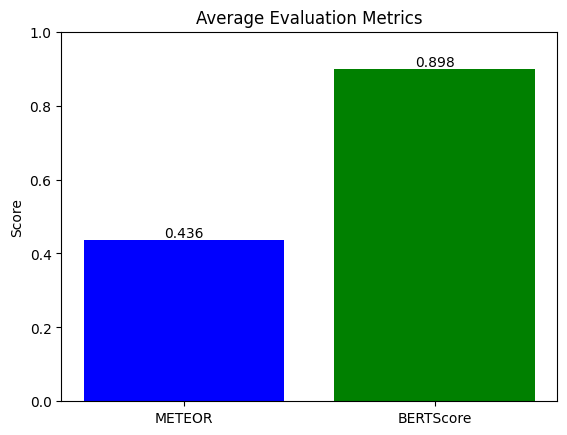

In [ ]:
import pandas as pd
from transformers import T5ForConditionalGeneration, T5Tokenizer
from bert_score import score as bert_score
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import numpy as np

# Load the trained model
model = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/Curriculum RL based Text Summarize using T5 PLM/checkpoints/Model")
# Load the tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

def meteor_score(reference, hypothesis):
    # Tokenize reference and hypothesis
    ref_tokens = reference.split()
    hyp_tokens = hypothesis.split()

    # Count occurrences of each token
    ref_counter = Counter(ref_tokens)
    hyp_counter = Counter(hyp_tokens)

    # Calculate precision and recall
    precision = sum(min(ref_counter[token], hyp_counter[token]) for token in hyp_counter)
    recall = sum(min(ref_counter[token], hyp_counter[token]) for token in ref_counter)

    # Handle division by zero
    if len(hyp_tokens) == 0:
        precision = 0
    else:
        precision /= len(hyp_tokens)

    if len(ref_tokens) == 0:
        recall = 0
    else:
        recall /= len(ref_tokens)

    # Calculate meteor score
    meteor = (precision * recall) / (0.5 * (precision + recall))

    return meteor


# Function to generate summaries
def generate_summary(input_text):
    inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"], max_length=150, num_beams=1, early_stopping=True)
    generated_summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_summary

# Function to evaluate summaries using METEOR and BERTScore for the first 50 rows
def evaluate_summaries_first_50(medium_subset_pre):
    meteor_scores = []
    bert_scores = []

    # Iterate over the first 50 rows
    for index, row in medium_subset_pre.head(50).iterrows():
        input_text = row["Article"]
        reference_summary = row["Summary"]
        generated_summary = generate_summary("summarize: " + input_text)

        # Compute METEOR score
        meteor_score_value = meteor_score(reference_summary, generated_summary)
        meteor_scores.append(meteor_score_value)

        # Compute BERTScore
        P, R, F1 = bert_score([generated_summary], [reference_summary], lang='en', verbose=False)
        bert_score_value = F1.mean().item()
        bert_scores.append(bert_score_value)

        print(f"Article:\n{input_text}\nGenerated Summary:\n{generated_summary}\nReference Summary:\n{reference_summary}\nMETEOR Score: {meteor_score_value}\nBERTScore: {bert_score_value}\n")

    avg_meteor_score = sum(meteor_scores) / len(meteor_scores)
    avg_bert_score = sum(bert_scores) / len(bert_scores)

    return avg_meteor_score, avg_bert_score

# Calculate average scores
avg_meteor_score, avg_bert_score = evaluate_summaries_first_50(medium_subset_pre)

# Later, you can plot the average scores using Matplotlib or any other plotting library
# Example code for plotting:
import matplotlib.pyplot as plt

# Create a bar plot for METEOR and BERTScore
metrics = ['METEOR', 'BERTScore']
scores = [avg_meteor_score, avg_bert_score]

plt.bar(metrics, scores, color=['blue', 'green'])
plt.ylabel('Score')
plt.title('Average Evaluation Metrics')
plt.ylim(0, 1)  # Set the y-axis limit to match the score range

# Add average scores as text on the bars
for i, score in enumerate(scores):
    plt.text(i, score, f"{score:.3f}", ha='center', va='bottom')

plt.show()